In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from plotting.paper import plot_simple_draws, plot_simple_hists, plot_trained_draws, get_trained_draws
from plotting.scores import show_all_loss_scores, show_loss_scores, show_score_matrix, get_loss_scores, display_score, get_loss_scores_from_args
import itertools
import numpy as onp
from reusable.util import load_args
import pandas as pd

### New table for 1: exp2, exp1

In [14]:
scores = get_loss_scores(16, "exp1", 1, "B")
scores["frobenius"] = scores["frobenius"][:,:4]
display_score(scores, "frobenius", "./gen_plots/16/tables/16_exp1_frobenius.tex",   colour_by_rank=False, scale_values=None)

In [15]:
scores = get_loss_scores(16, "exp1", 1, "B")
print(scores["mmd_avg"])
display_score(scores, "mmd_avg", "./gen_plots/16/tables/16_exp1_mmd.tex", colour_by_rank=True)

[0.0958544  0.2637125  0.00051557 0.00032286 0.00032403 0.07743461
 0.04395887 0.04264363 0.04259038]


In [6]:
scores = get_loss_scores(16, "exp2", 1, "B")
print(scores["mmd_avg"])
display_score(scores, "mmd_avg", "./gen_plots/16/tables/16_exp2_1_mmd_avg_rank_table.tex", colour_by_rank=True, scale_values=1000, override_col_labels=["Average MMD score, $\\times 10^{-3}$"])

[0.0072536  0.00679963 0.00663206 0.00799613 0.00774495 0.00850917
 0.00642092 0.0073843  0.00792916 0.00848981 0.03516117 0.01061221
 0.00547303 0.00695042 0.00733345 0.05323736 0.01105798 0.00632844
 0.00857782 0.00774049]


In [7]:
scores = get_loss_scores(16, "exp3", 1, "B")
scores["frobenius"] = scores["frobenius"][:,:4]
display_score(scores, "frobenius", "./gen_plots/16/tables/16_exp3_1_frobenius_vals_table.tex",   colour_by_rank=False, scale_values=None)

### 16 exp 1 Moments table

In [16]:

scores = get_loss_scores(16, "exp1", 1, "B", average_subset=[25, 75])
scores["avg_moments"] = scores["avg_moments"][:,:4]
display_score(
    scores,
    "avg_moments",
    "./gen_plots/16/tables/16_exp1_1_avg_moments_ext.tex",
    colour_by_rank=True,
    scale_values=None,
    use_extend_row_index=True,
    colouring_data=onp.concatenate(
        (
            onp.full((1, 4), 1e18),
            onp.abs(onp.array(scores["avg_vae_moments"][:,:4]) - onp.array(scores["avg_gp_moments"][:,:4])),
        ),
        axis=0,
    ),
)


### 16 exp 3 MMD table, with shorter titles

In [9]:
num_moments = 4

args = load_args(16, 1, "exp3")
scores = get_loss_scores_from_args(args, "B", average_subset=[25, 75])


scores["avg_moments"] = scores["avg_moments"][:, :num_moments]
print(scores["loss_fns"])
pairs = itertools.product(args["Brange"], args["Arange"])
new_index = [(f"${x[1]}$", f"${x[0]}$") for x in pairs]
new_index = pd.MultiIndex.from_tuples(new_index, names = ["$\\alpha$", "$\\beta$"])

scores["frobenius"] = scores["frobenius"][:, :4]
display_score(
    scores,
    "frobenius",
    "./gen_plots/16/tables/16_exp3_1_frobenius_vals_table.tex",
    colour_by_rank=False,
    scale_values=None,
    prettify_row_labels=False,
    override_row_index=new_index
)

new_index = pd.MultiIndex.from_arrays([["GP"], [""]], names=["$\\alpha$", "$\\beta$"]).union(new_index, sort=False)

display_score(
    scores,
    "avg_moments",
    "./gen_plots/16/tables/16_exp3_moments.tex",
    colour_by_rank=True,
    scale_values=None,
    use_extend_row_index=True,
    colouring_data=onp.concatenate(
        (
            onp.full((1, num_moments), 1e18),
            onp.abs(
                onp.array(scores["avg_vae_moments"][:, :num_moments])
                - onp.array(scores["avg_gp_moments"][:, :num_moments])
            ),
        ),
        axis=0,
    ),
    prettify_row_labels=False,
    override_row_index=new_index
)


['10RCL+mmd_rbf_sum-4.0+KLD', 'RCL+mmd_rbf_sum-4.0+KLD', '0.1RCL+mmd_rbf_sum-4.0+KLD', '0.01RCL+mmd_rbf_sum-4.0+KLD', '10RCL+5mmd_rbf_sum-4.0+KLD', 'RCL+5mmd_rbf_sum-4.0+KLD', '0.1RCL+5mmd_rbf_sum-4.0+KLD', '0.01RCL+5mmd_rbf_sum-4.0+KLD', '10RCL+10mmd_rbf_sum-4.0+KLD', 'RCL+10mmd_rbf_sum-4.0+KLD', '0.1RCL+10mmd_rbf_sum-4.0+KLD', '0.01RCL+10mmd_rbf_sum-4.0+KLD', '10RCL+15mmd_rbf_sum-4.0+KLD', 'RCL+15mmd_rbf_sum-4.0+KLD', '0.1RCL+15mmd_rbf_sum-4.0+KLD', '0.01RCL+15mmd_rbf_sum-4.0+KLD', '10RCL+20mmd_rbf_sum-4.0+KLD', 'RCL+20mmd_rbf_sum-4.0+KLD', '0.1RCL+20mmd_rbf_sum-4.0+KLD', '0.01RCL+20mmd_rbf_sum-4.0+KLD']


In [10]:
show_score_matrix(16, "exp3", 1, "B", (5,4), ["1","5","10","15", "20"],["10", "1", "0.1", "0.01"])

[['10RCL+mmd_rbf_sum-4.0+KLD' 'RCL+mmd_rbf_sum-4.0+KLD'
  '0.1RCL+mmd_rbf_sum-4.0+KLD' '0.01RCL+mmd_rbf_sum-4.0+KLD']
 ['10RCL+5mmd_rbf_sum-4.0+KLD' 'RCL+5mmd_rbf_sum-4.0+KLD'
  '0.1RCL+5mmd_rbf_sum-4.0+KLD' '0.01RCL+5mmd_rbf_sum-4.0+KLD']
 ['10RCL+10mmd_rbf_sum-4.0+KLD' 'RCL+10mmd_rbf_sum-4.0+KLD'
  '0.1RCL+10mmd_rbf_sum-4.0+KLD' '0.01RCL+10mmd_rbf_sum-4.0+KLD']
 ['10RCL+15mmd_rbf_sum-4.0+KLD' 'RCL+15mmd_rbf_sum-4.0+KLD'
  '0.1RCL+15mmd_rbf_sum-4.0+KLD' '0.01RCL+15mmd_rbf_sum-4.0+KLD']
 ['10RCL+20mmd_rbf_sum-4.0+KLD' 'RCL+20mmd_rbf_sum-4.0+KLD'
  '0.1RCL+20mmd_rbf_sum-4.0+KLD' '0.01RCL+20mmd_rbf_sum-4.0+KLD']]


### 16 exp 3 MMD table, unaveraged (for appendix)

In [11]:
num_moments = 4

args = load_args(16, 1, "exp3")
scores = get_loss_scores_from_args(args, "B", average_subset=[25, 75])


scores["avg_moments"] = scores["avg_moments"][:, :num_moments]
print(scores["loss_fns"])
pairs = itertools.product(args["Brange"], args["Arange"])
new_index = [(f"${x[1]}$", f"${x[0]}$") for x in pairs]
new_index = pd.MultiIndex.from_tuples(new_index, names = ["$\\alpha$", "$\\beta$"])


display_score(
    scores,
    "mmd",
    "./gen_plots/16/tables/16_exp3_mmd_unavg.tex",
    colour_by_rank=True,
    scale_values=None,
    use_extend_row_index=False,
    prettify_row_labels=False,
    override_row_index=new_index,
    rotate_col_headers=True
)




['10RCL+mmd_rbf_sum-4.0+KLD', 'RCL+mmd_rbf_sum-4.0+KLD', '0.1RCL+mmd_rbf_sum-4.0+KLD', '0.01RCL+mmd_rbf_sum-4.0+KLD', '10RCL+5mmd_rbf_sum-4.0+KLD', 'RCL+5mmd_rbf_sum-4.0+KLD', '0.1RCL+5mmd_rbf_sum-4.0+KLD', '0.01RCL+5mmd_rbf_sum-4.0+KLD', '10RCL+10mmd_rbf_sum-4.0+KLD', 'RCL+10mmd_rbf_sum-4.0+KLD', '0.1RCL+10mmd_rbf_sum-4.0+KLD', '0.01RCL+10mmd_rbf_sum-4.0+KLD', '10RCL+15mmd_rbf_sum-4.0+KLD', 'RCL+15mmd_rbf_sum-4.0+KLD', '0.1RCL+15mmd_rbf_sum-4.0+KLD', '0.01RCL+15mmd_rbf_sum-4.0+KLD', '10RCL+20mmd_rbf_sum-4.0+KLD', 'RCL+20mmd_rbf_sum-4.0+KLD', '0.1RCL+20mmd_rbf_sum-4.0+KLD', '0.01RCL+20mmd_rbf_sum-4.0+KLD']


### Matrix for 16 exp 2

In [12]:
show_score_matrix(16, "exp2", 1, "B", (4,5), ["0.1", "1", "10", "100"],["1","2","4","6","8"])

[['0.1RCL+10mmd_rqk_sum-1,0.1+KLD' '0.1RCL+10mmd_rqk_sum-2,0.1+KLD'
  '0.1RCL+10mmd_rqk_sum-4,0.1+KLD' '0.1RCL+10mmd_rqk_sum-6,0.1+KLD'
  '0.1RCL+10mmd_rqk_sum-8,0.1+KLD']
 ['0.1RCL+10mmd_rqk_sum-1,1+KLD' '0.1RCL+10mmd_rqk_sum-2,1+KLD'
  '0.1RCL+10mmd_rqk_sum-4,1+KLD' '0.1RCL+10mmd_rqk_sum-6,1+KLD'
  '0.1RCL+10mmd_rqk_sum-8,1+KLD']
 ['0.1RCL+10mmd_rqk_sum-1,10+KLD' '0.1RCL+10mmd_rqk_sum-2,10+KLD'
  '0.1RCL+10mmd_rqk_sum-4,10+KLD' '0.1RCL+10mmd_rqk_sum-6,10+KLD'
  '0.1RCL+10mmd_rqk_sum-8,10+KLD']
 ['0.1RCL+10mmd_rqk_sum-1,100+KLD' '0.1RCL+10mmd_rqk_sum-2,100+KLD'
  '0.1RCL+10mmd_rqk_sum-4,100+KLD' '0.1RCL+10mmd_rqk_sum-6,100+KLD'
  '0.1RCL+10mmd_rqk_sum-8,100+KLD']]


### 16 exp 2 tables

In [17]:
num_moments = 4

args = load_args(16, 1, "exp2")
scores = get_loss_scores_from_args(args, "B", average_subset=[25, 75])


scores["avg_moments"] = scores["avg_moments"][:, :num_moments]
print(scores["loss_fns"])
pairs = itertools.product(args["Brange"], args["Arange"])
new_index = [(f"${x[1]}$", f"${x[0]}$") for x in pairs]
new_index = pd.MultiIndex.from_tuples(new_index, names = ["$\\alpha$", "$\ell$"])

scores["frobenius"] = scores["frobenius"][:, :4]
display_score(
    scores,
    "frobenius",
    "./gen_plots/16/tables/16_exp2_1_frobenius.tex",
    colour_by_rank=False,
    scale_values=None,
    prettify_row_labels=False,
    override_row_index=new_index
)

new_index = pd.MultiIndex.from_arrays([["GP"], [""]], names=["$\\alpha$", "$\ell$"]).union(new_index, sort=False)

display_score(
    scores,
    "avg_moments",
    "./gen_plots/16/tables/16_exp2_moments.tex",
    colour_by_rank=True,
    scale_values=None,
    use_extend_row_index=True,
    colouring_data=onp.concatenate(
        (
            onp.full((1, num_moments), 1e18),
            onp.abs(
                onp.array(scores["avg_vae_moments"][:, :num_moments])
                - onp.array(scores["avg_gp_moments"][:, :num_moments])
            ),
        ),
        axis=0,
    ),
    prettify_row_labels=False,
    override_row_index=new_index
)


['0.1RCL+10mmd_rqk_sum-1,0.1+KLD', '0.1RCL+10mmd_rqk_sum-2,0.1+KLD', '0.1RCL+10mmd_rqk_sum-4,0.1+KLD', '0.1RCL+10mmd_rqk_sum-6,0.1+KLD', '0.1RCL+10mmd_rqk_sum-8,0.1+KLD', '0.1RCL+10mmd_rqk_sum-1,1+KLD', '0.1RCL+10mmd_rqk_sum-2,1+KLD', '0.1RCL+10mmd_rqk_sum-4,1+KLD', '0.1RCL+10mmd_rqk_sum-6,1+KLD', '0.1RCL+10mmd_rqk_sum-8,1+KLD', '0.1RCL+10mmd_rqk_sum-1,10+KLD', '0.1RCL+10mmd_rqk_sum-2,10+KLD', '0.1RCL+10mmd_rqk_sum-4,10+KLD', '0.1RCL+10mmd_rqk_sum-6,10+KLD', '0.1RCL+10mmd_rqk_sum-8,10+KLD', '0.1RCL+10mmd_rqk_sum-1,100+KLD', '0.1RCL+10mmd_rqk_sum-2,100+KLD', '0.1RCL+10mmd_rqk_sum-4,100+KLD', '0.1RCL+10mmd_rqk_sum-6,100+KLD', '0.1RCL+10mmd_rqk_sum-8,100+KLD']


### Bigger text for 16 exp 1 and exp4

Mean 1.0050125 Variance 0.010151183
0 Figure(1800x1200)


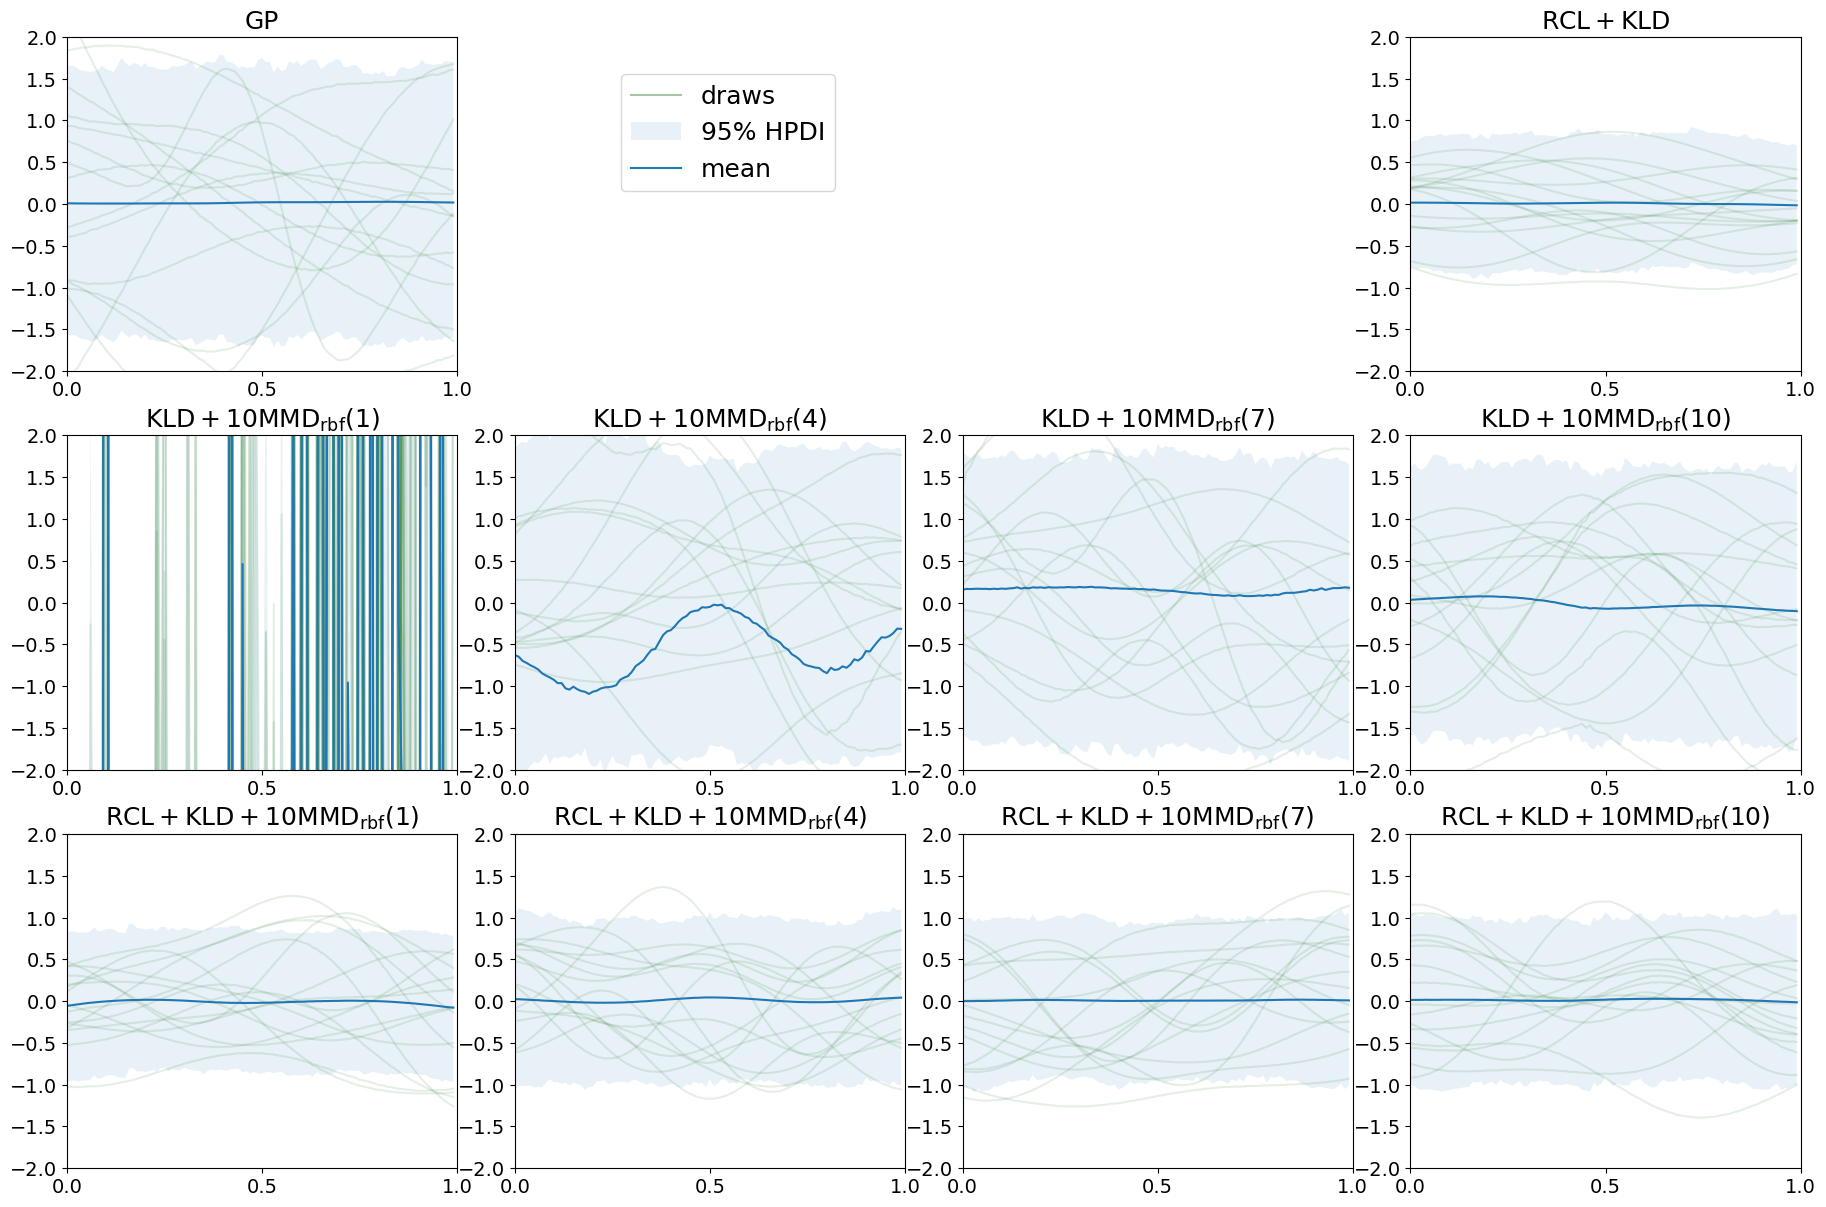

In [46]:
code = 16
exp_name = "exp1"
args_disambig = 1

draws, args = get_trained_draws(code, exp_name, args_disambig, "B", include_standard_vae=False, include_gp=True, prettify_titles=True)

plot_trained_draws(
    draws,
    args["x"],
    4,
    3,
    f"/{code}/{code}_{exp_name}_{args_disambig}",
    backfill="align_right",
    page_max_rows=None,
    y_axis_label=None,
    legend_pos="empty_space",
    show_x_label=False,
    landscape=True
)

Mean 1.0050125 Variance 0.010151183
0 Figure(1800x1200)


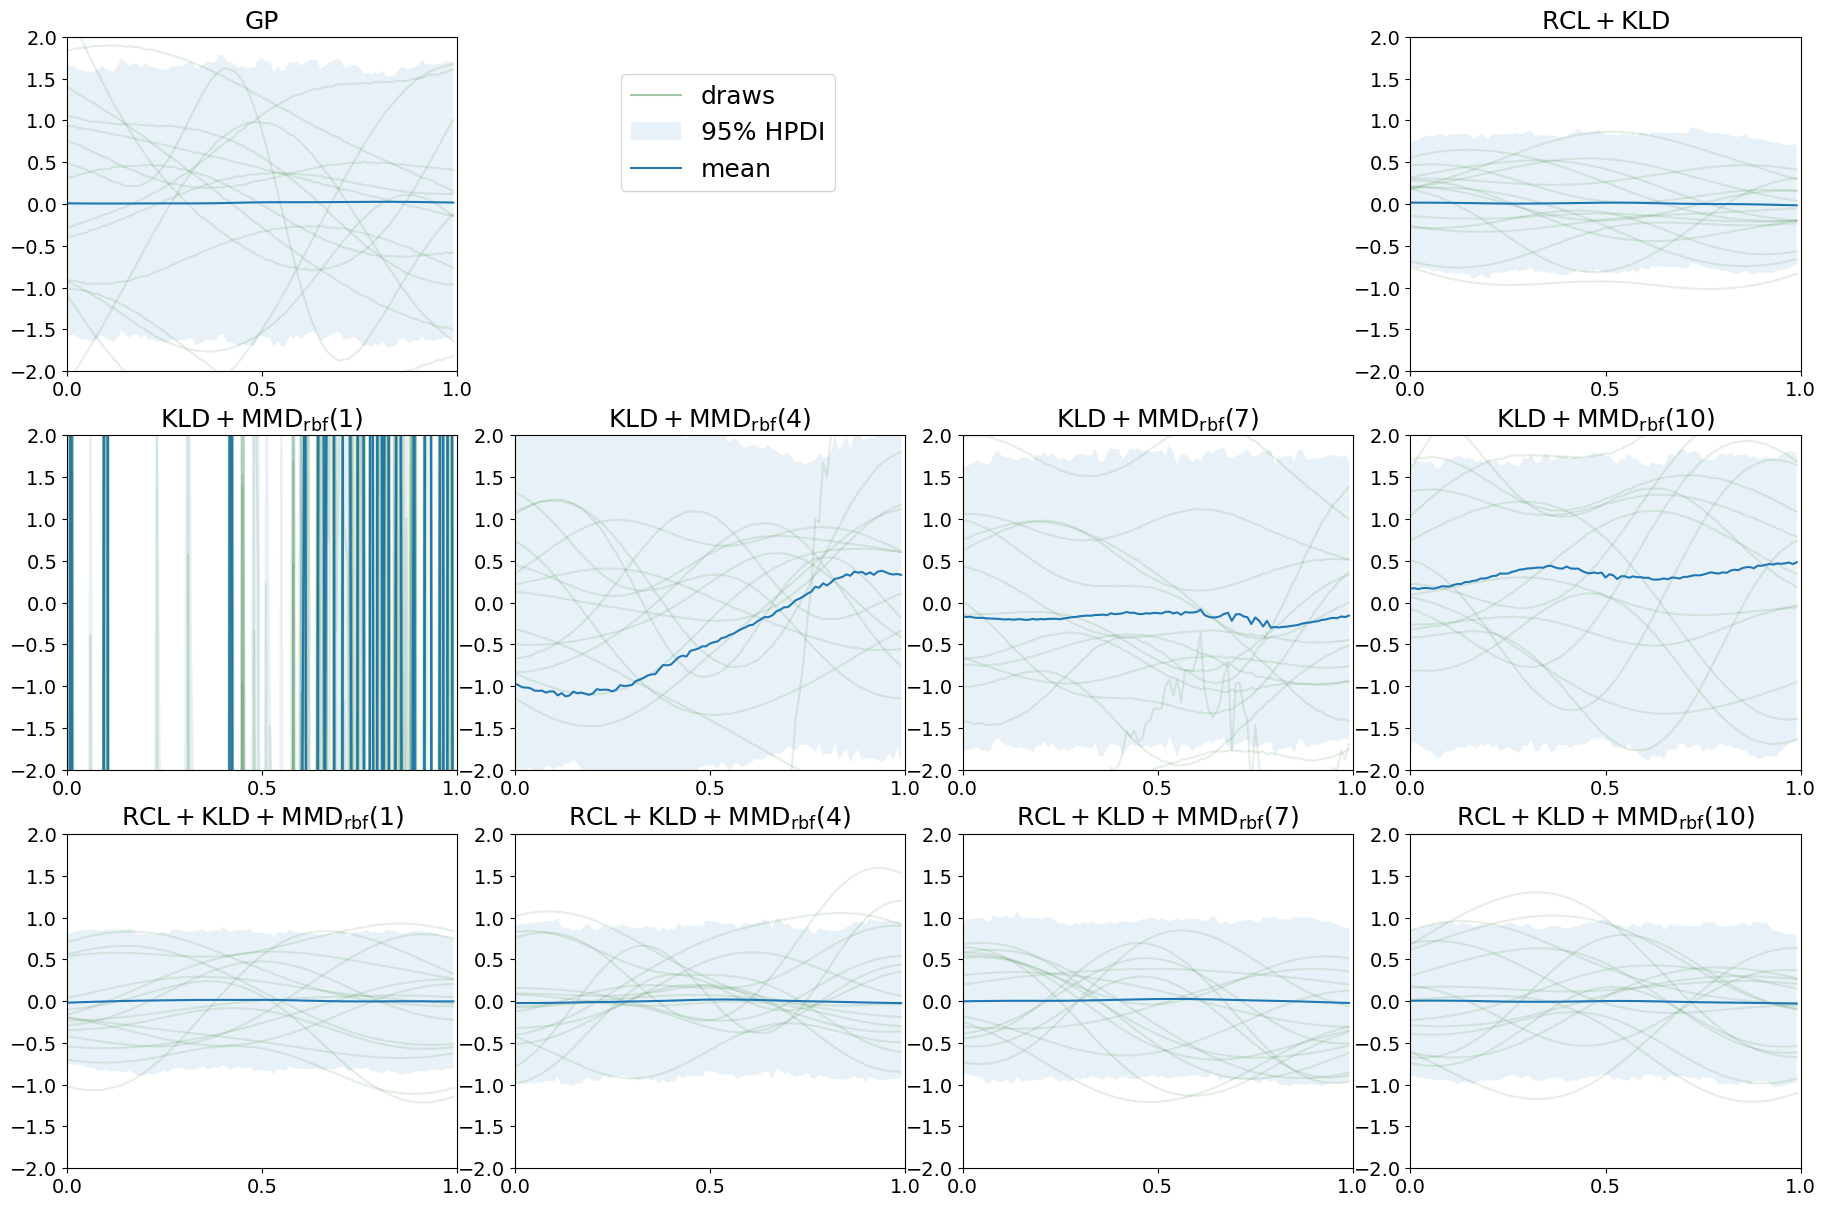

In [47]:
code = 16
exp_name = "exp4"
args_disambig = 1

draws, args = get_trained_draws(code, exp_name, args_disambig, "B", include_standard_vae=False, include_gp=True, prettify_titles=True)

plot_trained_draws(
    draws,
    args["x"],
    4,
    3,
    f"/{code}/{code}_{exp_name}_{args_disambig}",
    backfill="align_right",
    page_max_rows=None,
    y_axis_label=None,
    legend_pos="empty_space",
    show_x_label=False,
    landscape=True
)

### Bigger text for 16 exp 3

Mean 1.0050125 Variance 0.010151183
0 Figure(1200x1800)


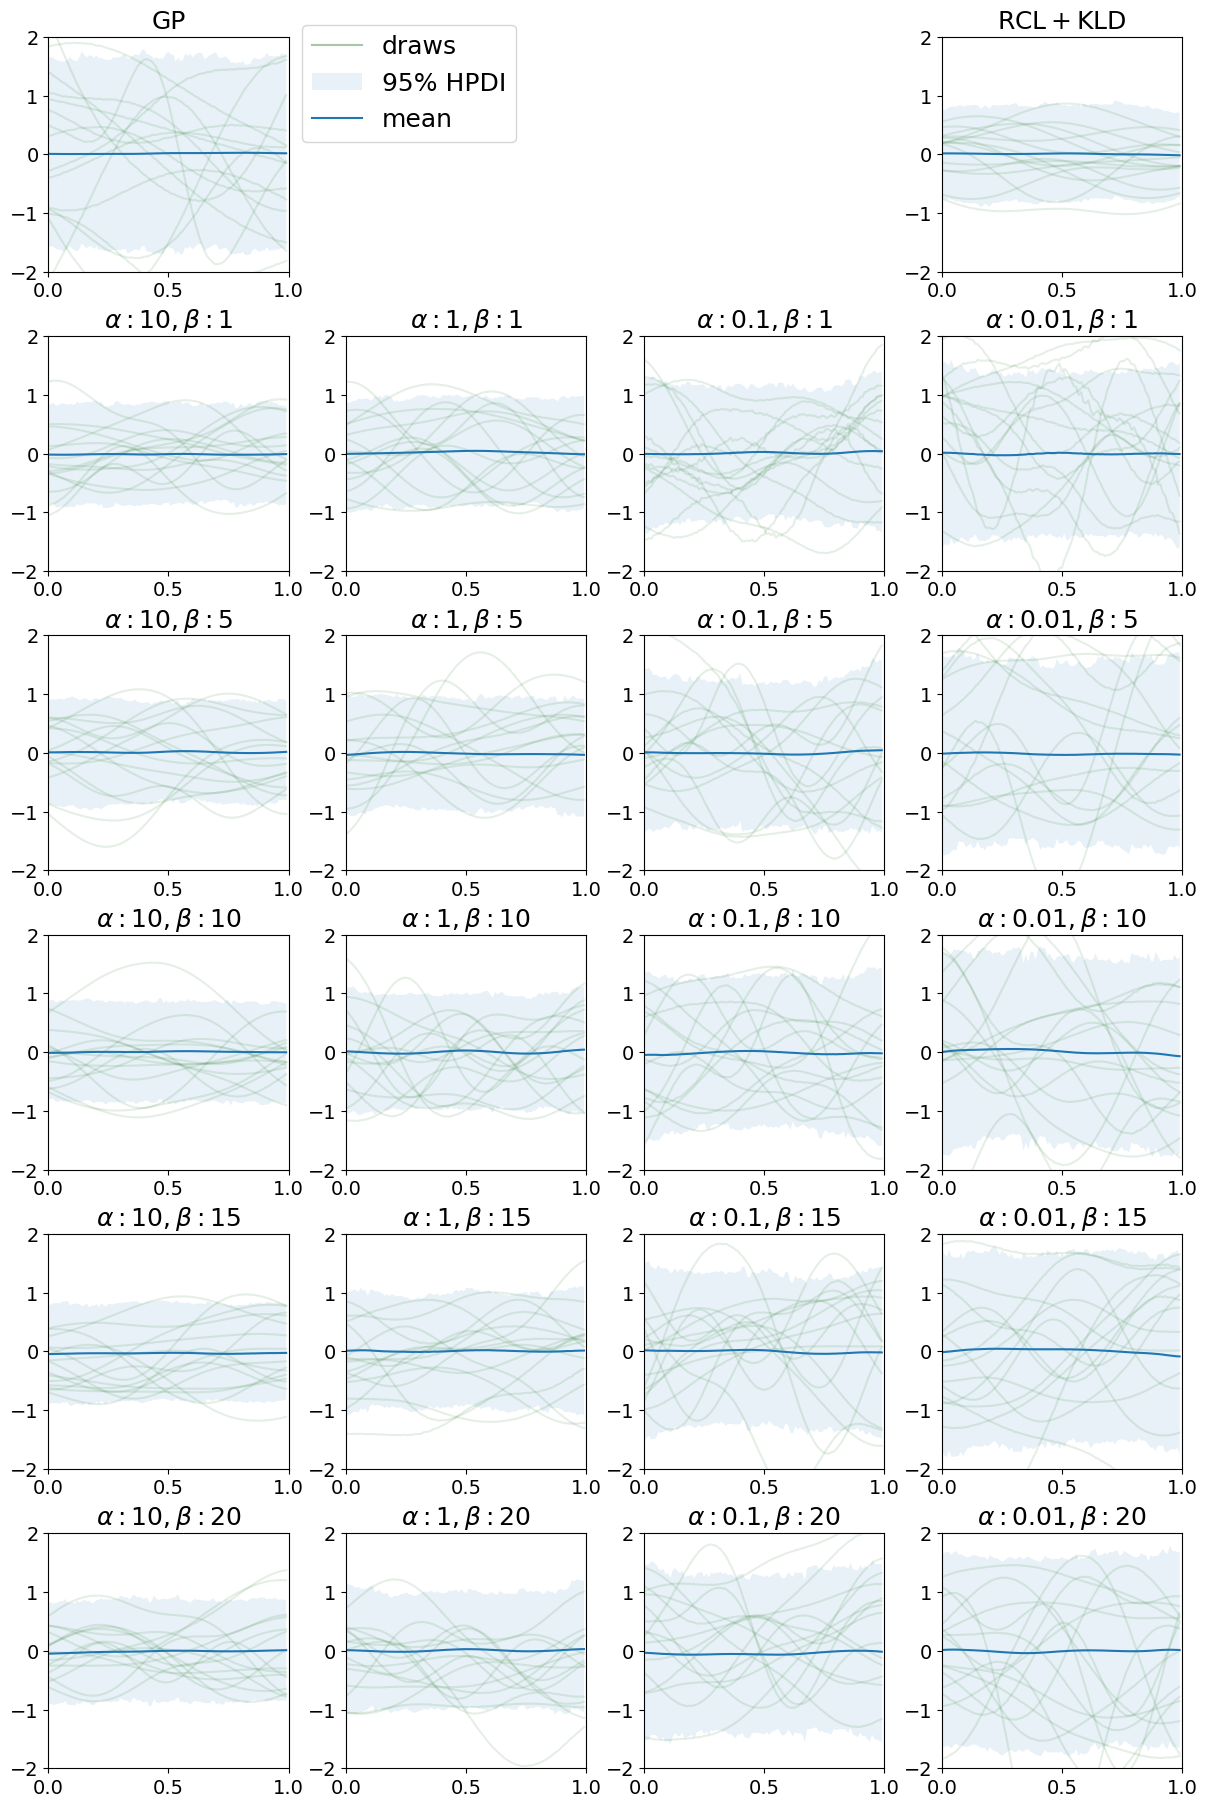

In [35]:
code = 16
exp_name = "exp3"
args_disambig = 1

draws, args = get_trained_draws(code, exp_name, args_disambig, "B", include_standard_vae=True, include_gp=True, prettify_titles=True)
old_titles = [x[1] for x in draws]
pairs = itertools.product(args["Brange"],args["Arange"])
new_titles = old_titles[:2] + [f"$\\alpha: {x[1]}, \\beta: {x[0]}$" for x in pairs]
new_draws = list(zip([x[0] for x in draws], new_titles))
plot_trained_draws(
    new_draws,
    args["x"],
    4,
    6,
    f"/{code}/{code}_{exp_name}_{args_disambig}",
    backfill="align_right",
    page_max_rows=None,
    y_axis_label=None,
    legend_pos="empty_space",
    show_x_label=False,
    landscape=False
)

### Custom titles for 16 exp 2 and splits

In [38]:
code = 16
exp_name = "exp2"
args_disambig = 1


draws, args = get_trained_draws(code, exp_name, args_disambig, "B", include_standard_vae=True, include_gp=True, prettify_titles=False, use_single_decoder=False)
old_titles = [x[1] for x in draws]
pairs = itertools.product(args["Brange"],args["Arange"])
new_titles = old_titles[:2] + [f"$\ell: {x[1]}, \\alpha: {x[0]}$" for x in pairs]
new_draws = zip([x[0] for x in draws], new_titles)


Mean 1.0050125 Variance 0.010151183


0 Figure(1800x1200)
0 Figure(1800x1200)


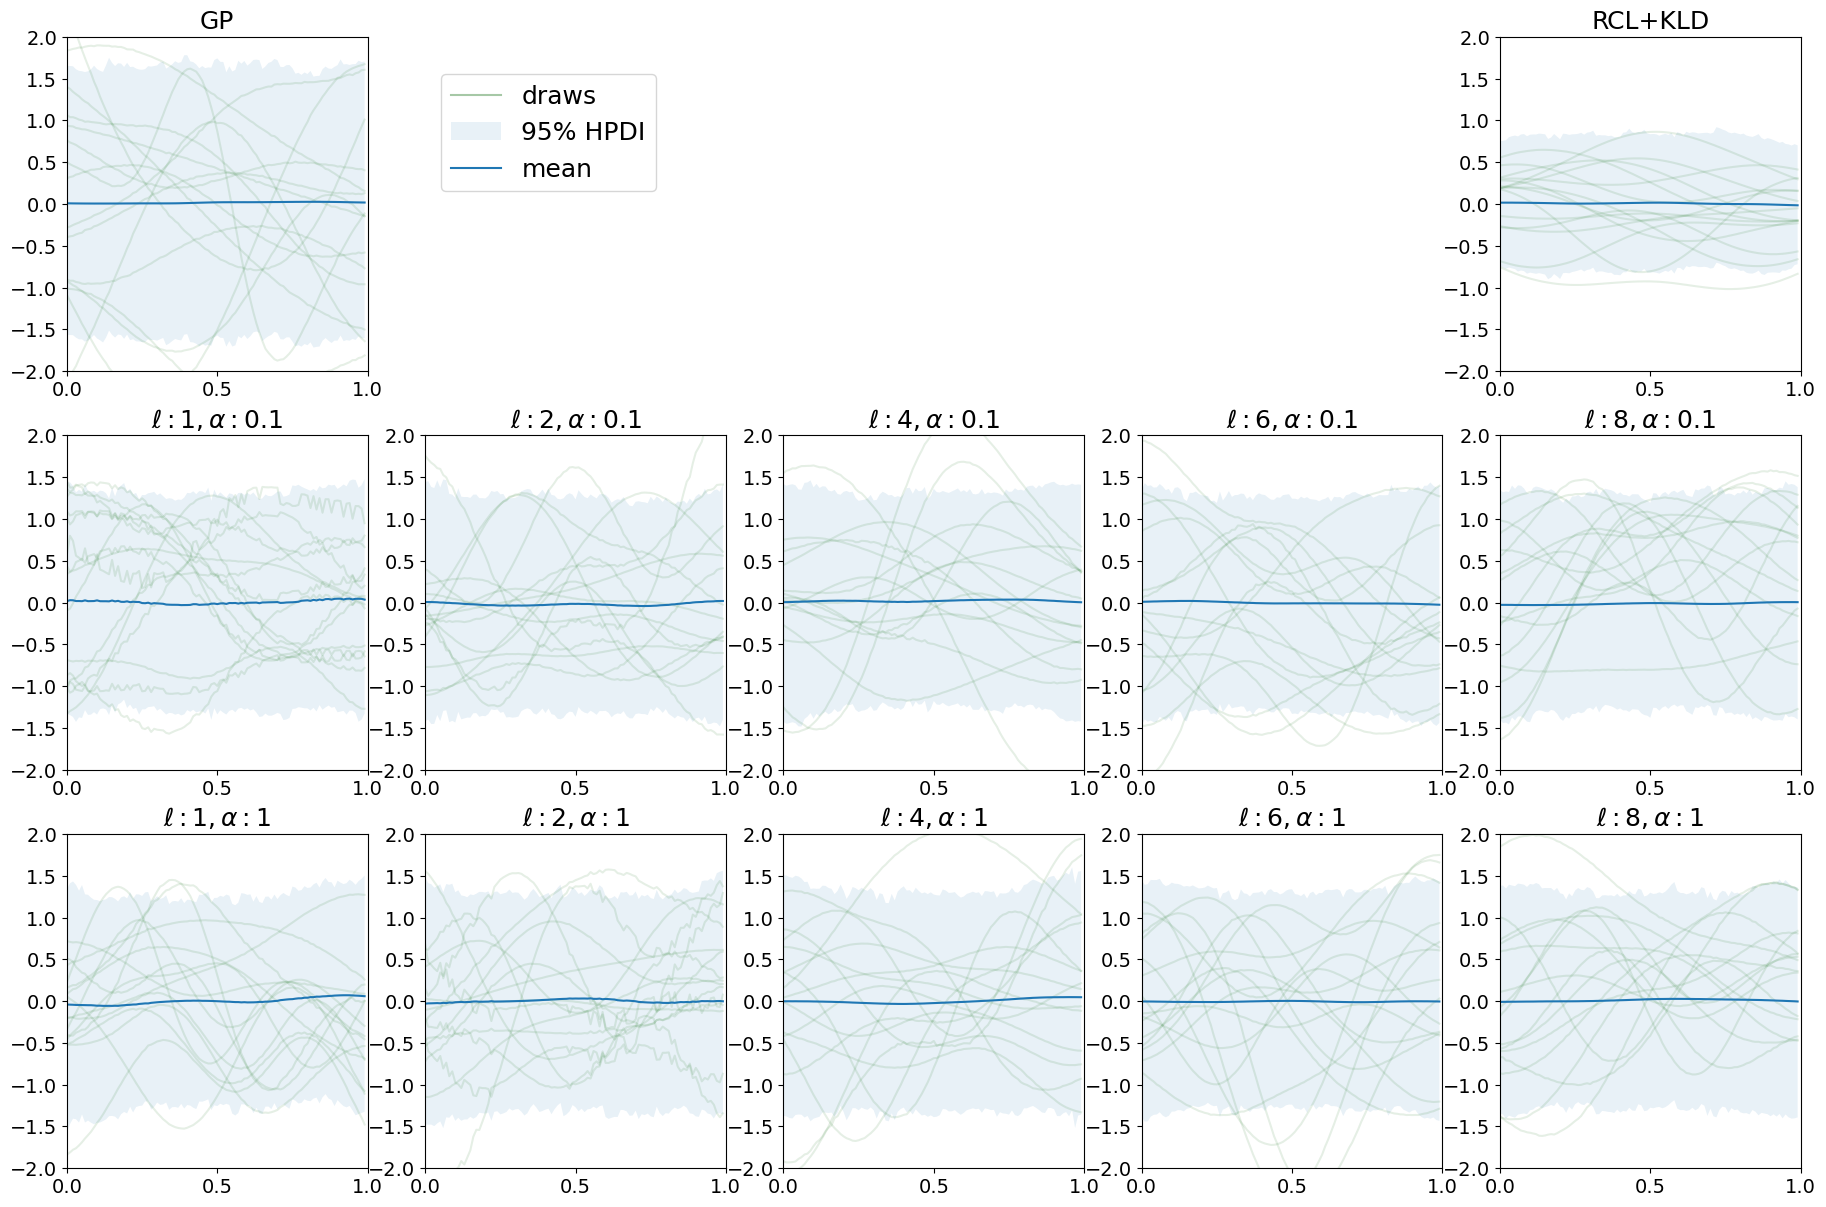

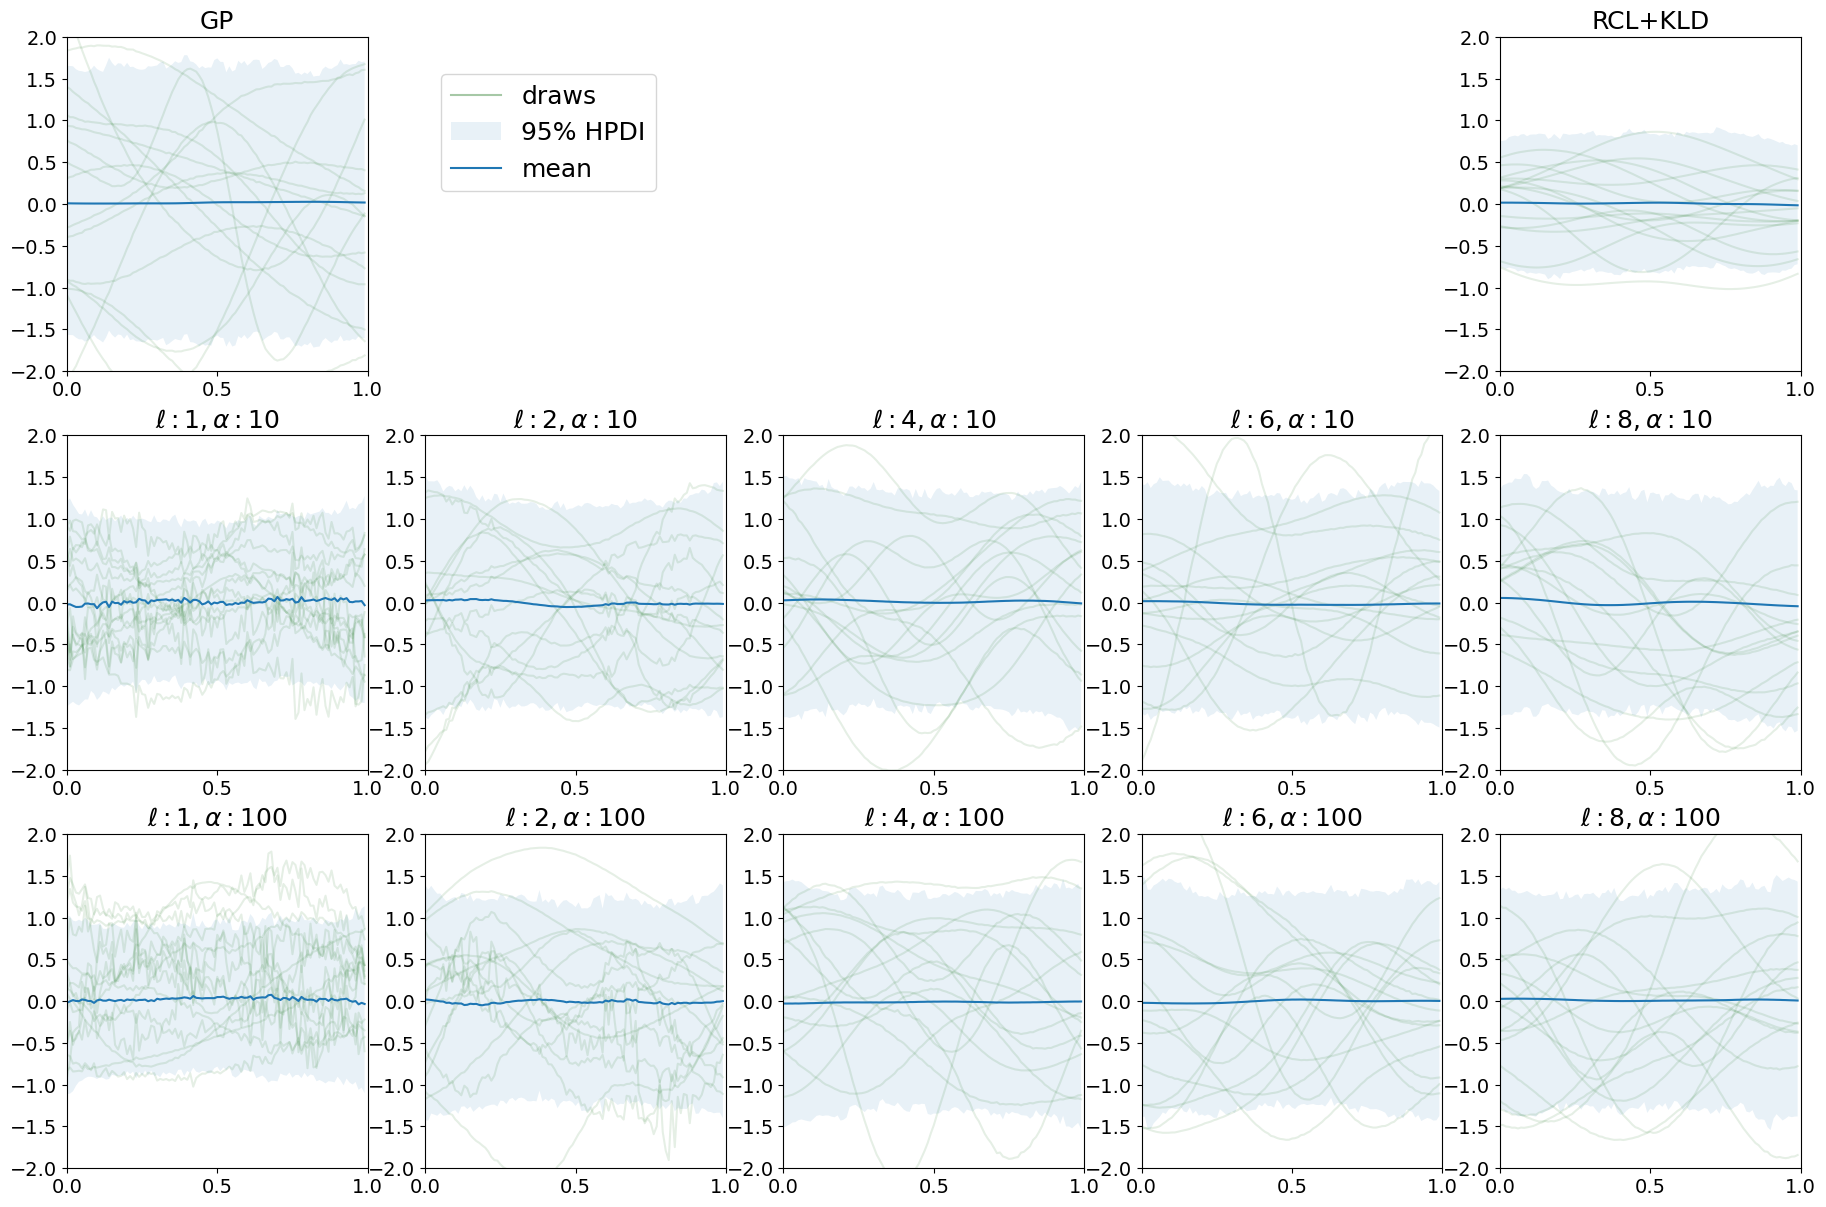

In [37]:
new_draws = list(new_draws)
plot_trained_draws(
    new_draws[:12],
    args["x"],
    5,
    3,
    f"/{code}/{code}_{exp_name}_{args_disambig}_page1",
    backfill="align_right",
    page_max_rows=None,
    y_axis_label=None,
    legend_pos="empty_space",
    show_x_label=False,
)
plot_trained_draws(
    new_draws[:2]+ new_draws[12:],
    args["x"],
    5,
    3,
    f"/{code}/{code}_{exp_name}_{args_disambig}_page2",
    backfill="align_right",
    page_max_rows=None,
    y_axis_label=None,
    legend_pos="empty_space",
    show_x_label=False,
)



### SPlits for 20 exp 2

Mean 1.0050125 Variance 0.010151183
0 Figure(1800x1200)
0 Figure(1800x1200)


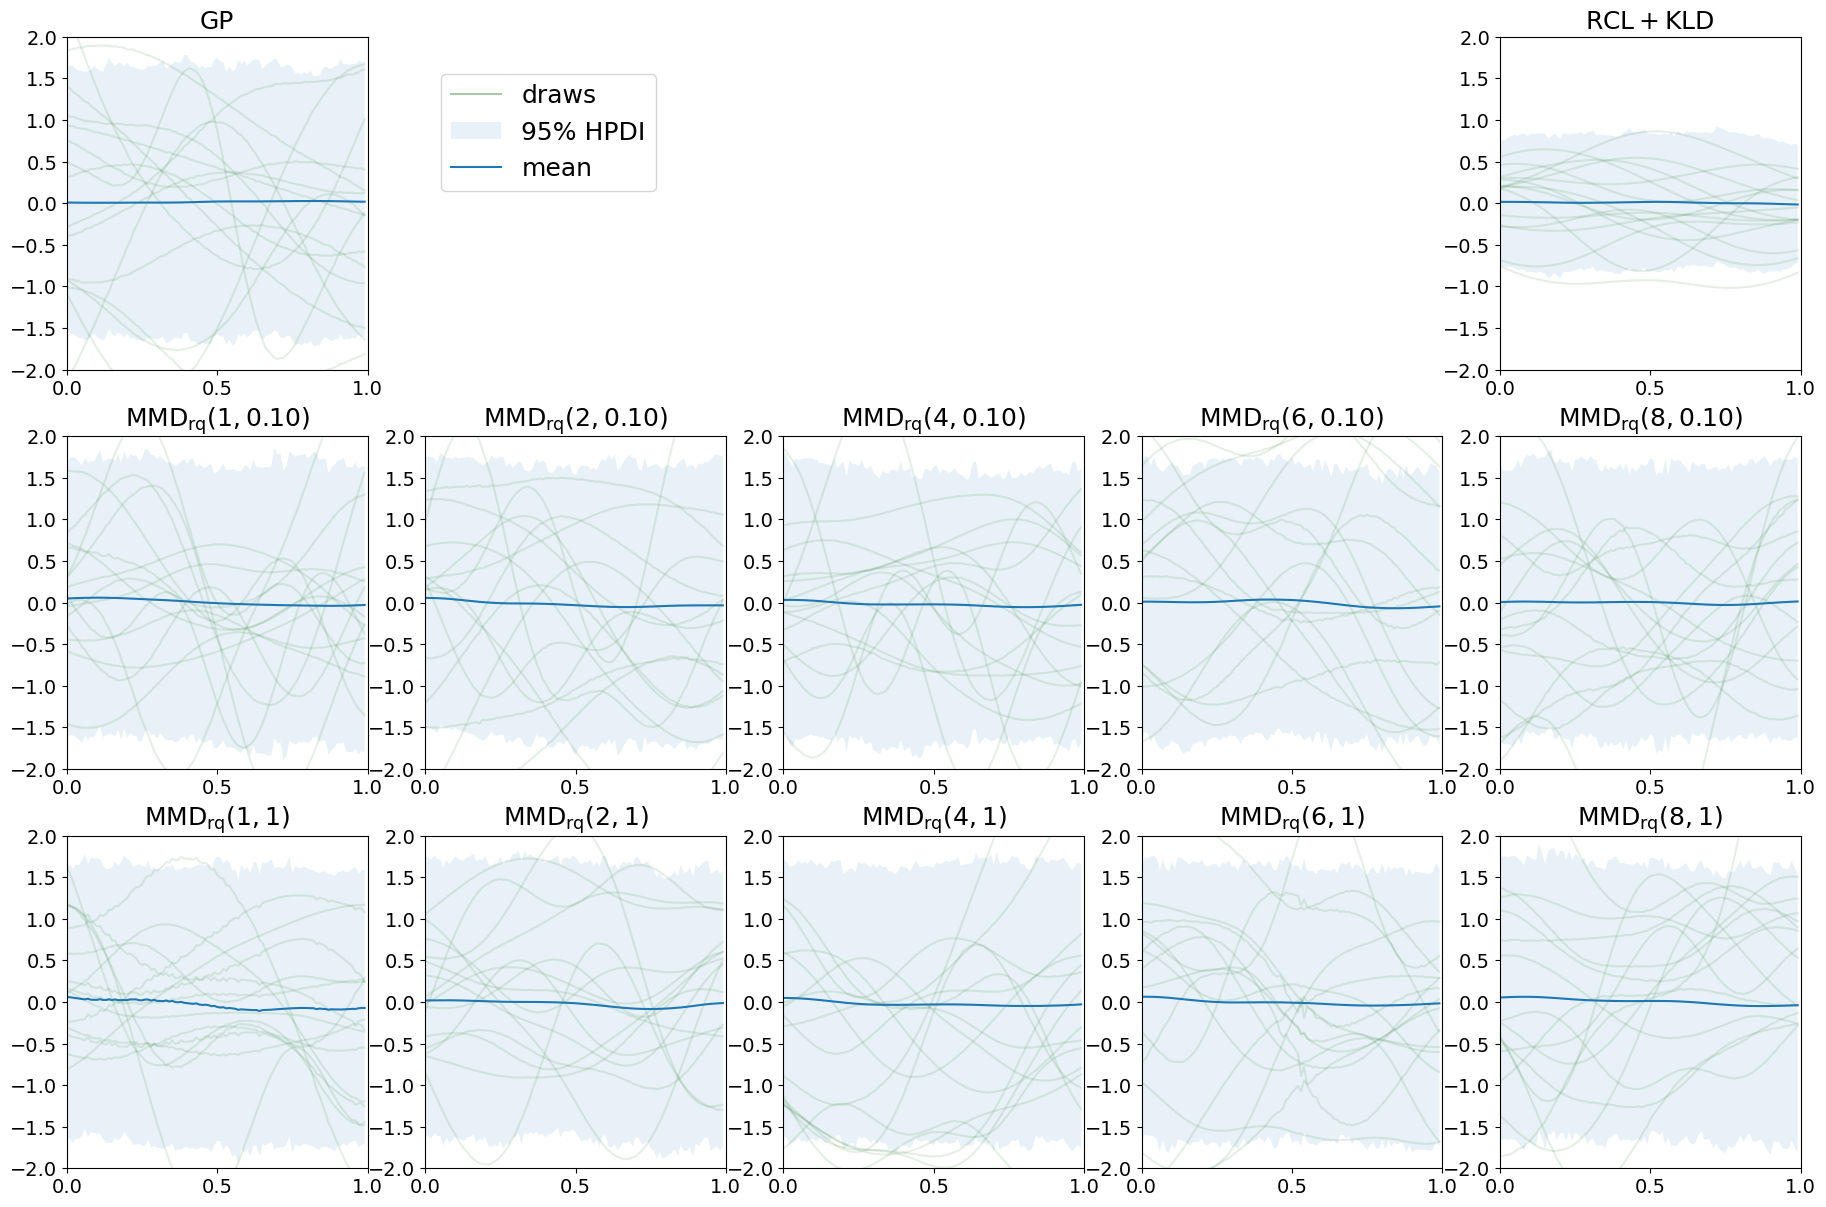

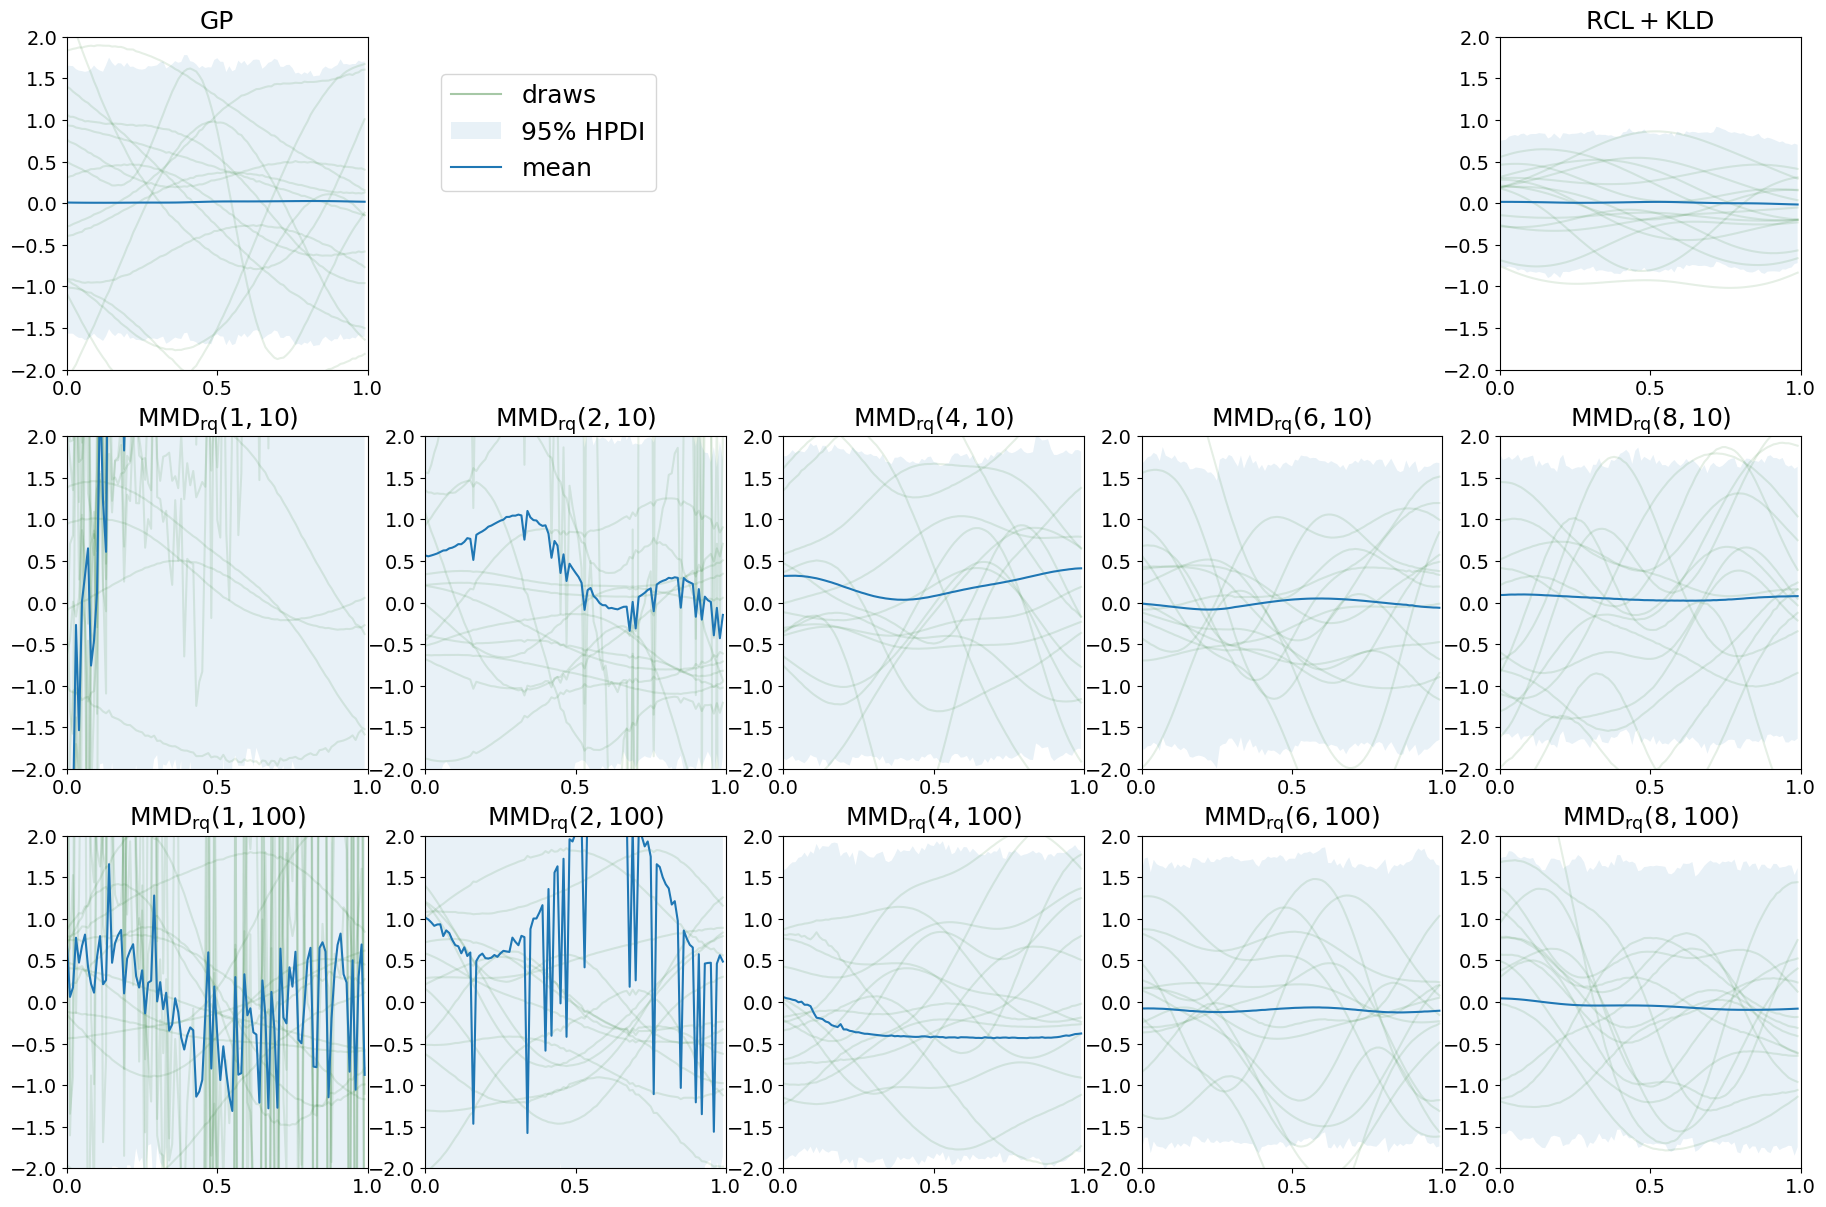

In [40]:


code = 20
exp_name = "exp2"
args_disambig = 1

draws, args = get_trained_draws(code, exp_name, args_disambig, "B", include_standard_vae=True, include_gp=True, prettify_titles=True, use_single_decoder=True)

plot_trained_draws(
    draws[:12],
    args["x"],
    5,
    3,
    f"/{code}/{code}_{exp_name}_{args_disambig}_page1",
    backfill="align_right",
    page_max_rows=None,
    y_axis_label=None,
    legend_pos="empty_space",
    show_x_label=False,
)
plot_trained_draws(
    draws[:2]+ draws[12:],
    args["x"],
    5,
    3,
    f"/{code}/{code}_{exp_name}_{args_disambig}_page2",
    backfill="align_right",
    page_max_rows=None,
    y_axis_label=None,
    legend_pos="empty_space",
    show_x_label=False,
)



### Normal (new) plots for 20 exp1

Mean 1.0050125 Variance 0.010151183
0 Figure(1800x1200)


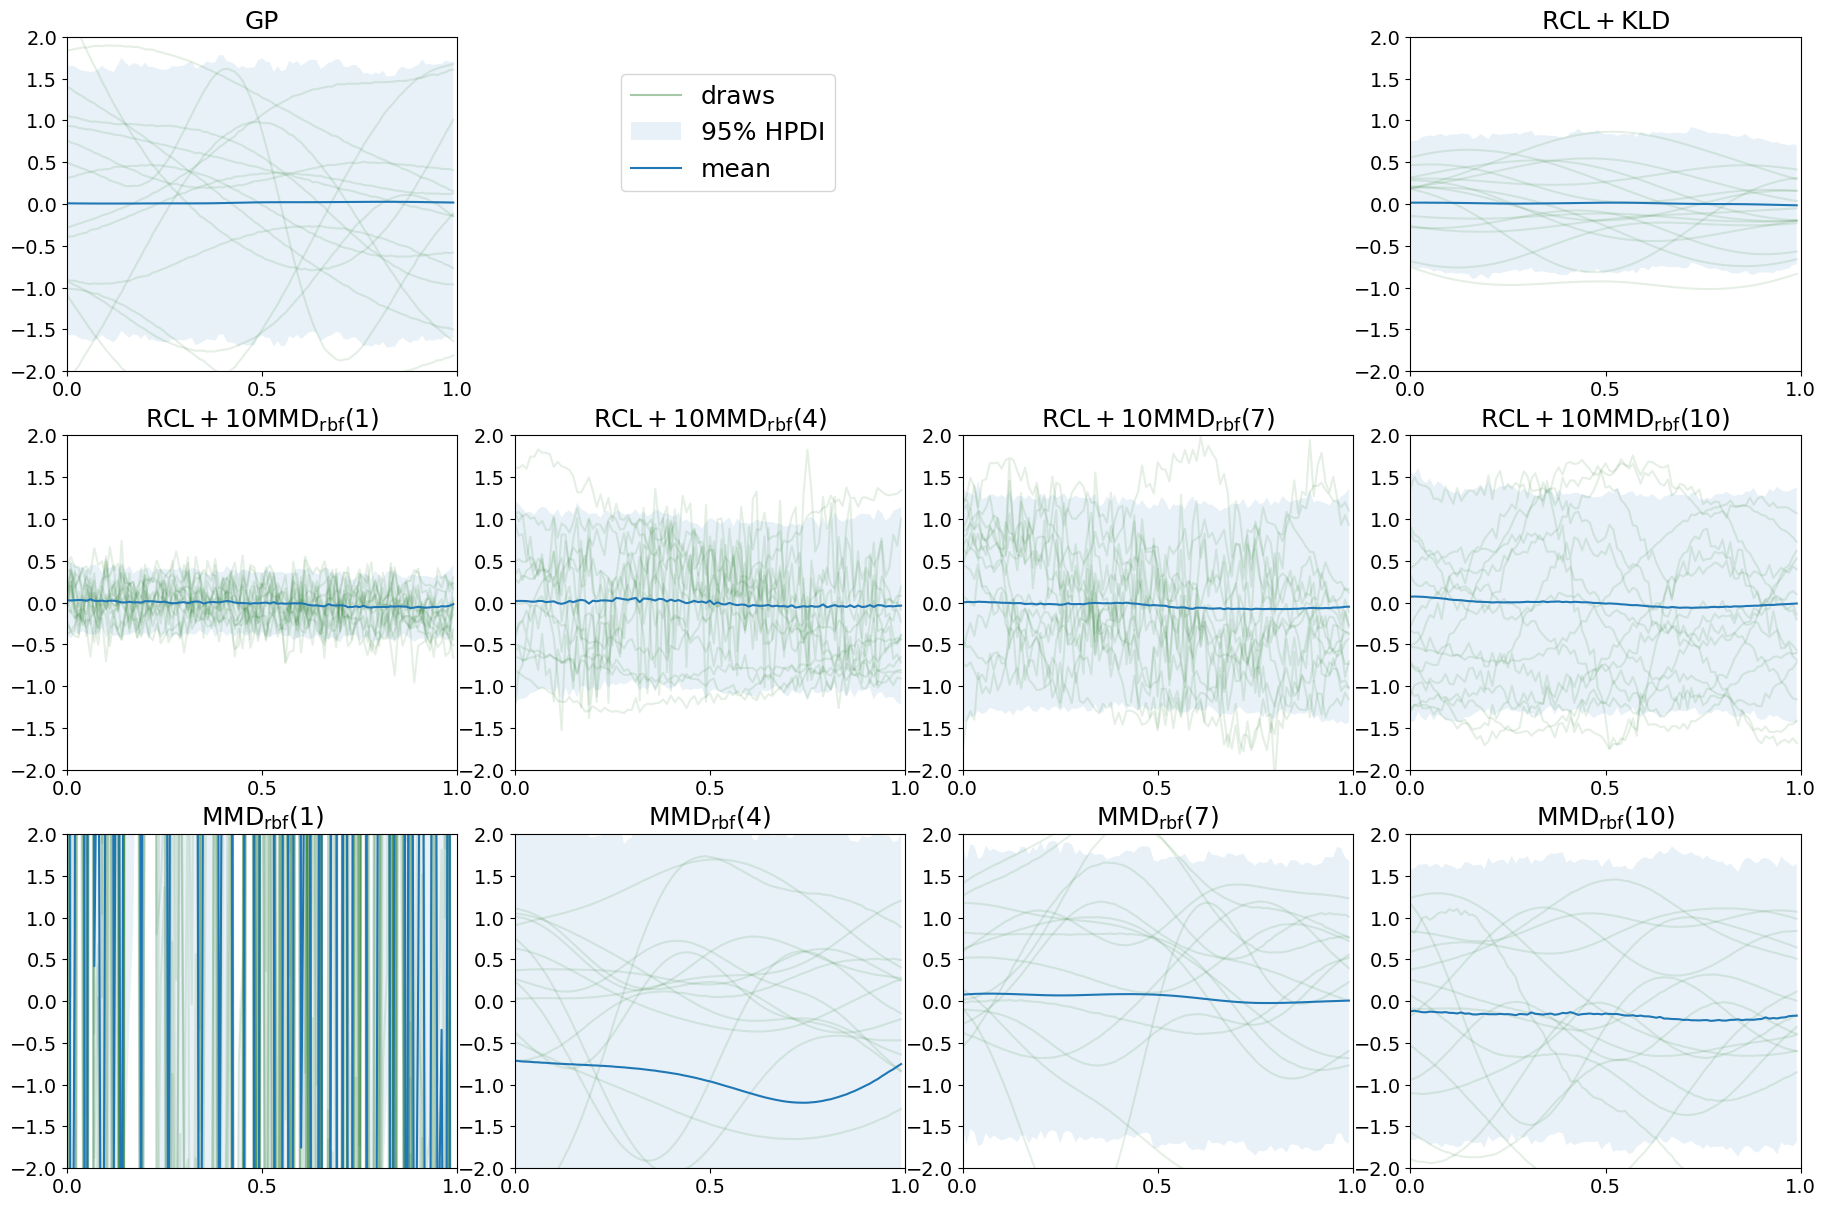

In [42]:


code = 20
exp_name = "exp1"
args_disambig = 1

draws, args = get_trained_draws(code, exp_name, args_disambig, "B", include_standard_vae=True, include_gp=True, prettify_titles=True, use_single_decoder=True)

plot_trained_draws(
    draws,
    args["x"],
    4,
    3,
    f"/{code}/{code}_{exp_name}_{args_disambig}_page1",
    backfill="align_right",
    page_max_rows=None,
    y_axis_label=None,
    legend_pos="empty_space",
    show_x_label=False,
)



### 20 exp 1 specifically 6 replot

Mean 1.0050125 Variance 0.010151183
[(0, (Array([[ 1.399784  ,  1.3778216 ,  1.3422097 , ..., -1.479306  ,
        -1.4872495 , -1.5028111 ],
       [ 0.50143105,  0.47589234,  0.45735636, ..., -0.22157964,
        -0.16612752, -0.11400241],
       [-2.141351  , -2.0743308 , -1.9978763 , ..., -1.5688231 ,
        -1.6075183 , -1.6414292 ],
       ...,
       [ 0.21099685,  0.2602832 ,  0.33058622, ..., -0.41852063,
        -0.42579463, -0.43173006],
       [-0.7717017 , -0.7290288 , -0.686403  , ..., -0.88142544,
        -0.82985526, -0.78098047],
       [-0.9393895 , -0.879302  , -0.8157513 , ...,  0.72734404,
         0.7726875 ,  0.81014895]], dtype=float32), 'GP')), (1, (Array([[ 0.21157551,  0.2099226 ,  0.20768294, ...,  0.16138488,
         0.16090631,  0.16087906],
       [ 0.31488773,  0.32487705,  0.3346369 , ..., -0.19012909,
        -0.19338974, -0.19633953],
       [ 0.19261417,  0.19980817,  0.206822  , ...,  0.05081987,
         0.04342088,  0.03620945],
       ...,
    

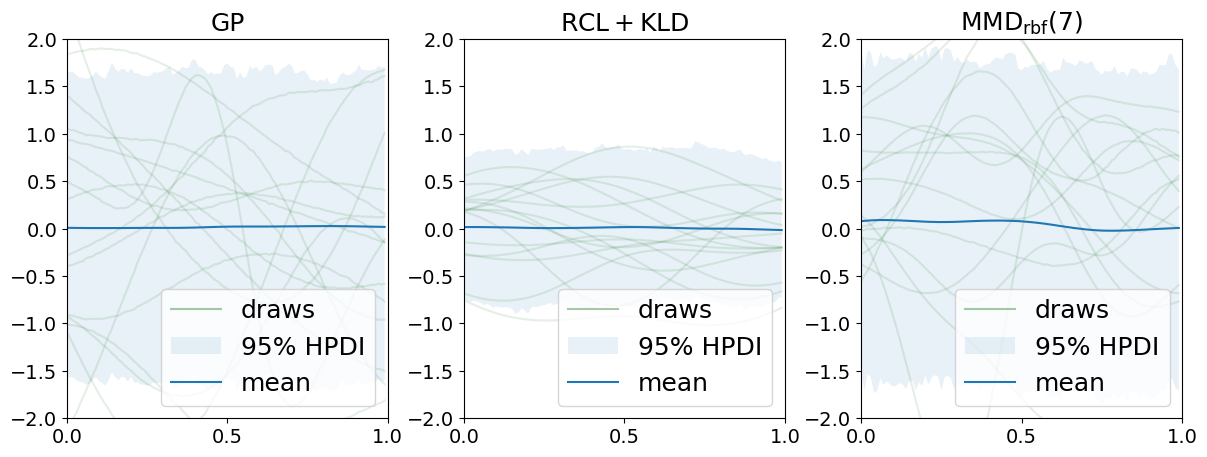

In [11]:


code = 20
exp_name = "exp1"
args_disambig = 1
loss_index = 8

draws, args = get_trained_draws(code, exp_name, args_disambig, "B", include_standard_vae=True, include_gp=True, prettify_titles=True, use_single_decoder=True)

print(list(enumerate(draws)))
plot_trained_draws(
    draws[:2] + [draws[loss_index]],
    args["x"],
    3,
    1,
    f"/{code}/{code}_{exp_name}_{args_disambig}_{loss_index}",
    backfill="align_right",
    page_max_rows=4,
    y_axis_label=None,
    legend_pos="all",
    show_x_label=False,
    landscape=False
)


# Old plots

In [ ]:
plot_simple_hists(16, "exp2", 1, "B")

In [ ]:
plot_simple_draws(16, "exp2", 1, "A", include_standard_vae=True)

In [ ]:
hists,args = get_training_histories(16, "exp1", 1, "B")
plot_training_histories(hists, "16")

In [ ]:
show_all_loss_scores([(16, "exp1", 1), (16, "exp2", 1), (16, "exp3", 1)], True)

In [ ]:
parameter_experiment = "exp1"
number = "1" # disambiguate argument files

show_loss_scores(16, parameter_experiment, number)

#plot_training_histories(16, experiment, number, num_cols=4, num_rows=3, backfill="align_right")
#plot_trained_draws(16, experiment, number, num_cols=4, num_rows=3, backfill="align_right")

#show_loss_scores_mat(16, experiment, number)

In [ ]:
parameter_experiment = "exp2"
number = "1" # disambiguate argument files

show_loss_scores(16, parameter_experiment, number)
# plot_training_histories(16, parameter_experiment, number, backfill="align_right")
# plot_trained_draws(16, parameter_experiment, number,  backfill="align_right", include_standard_vae=True)

In [ ]:
parameter_experiment = "exp3"
number = "1" # disambiguate argument files

show_loss_scores(16, parameter_experiment, number)
plot_training_histories(16, parameter_experiment, number, backfill="align_right")
plot_trained_draws(16, parameter_experiment, number,  backfill="align_right", include_standard_vae=True)

In [ ]:
experiment = "exp4"
number = "1" # disambiguate argument files

#show_loss_scores(16, experiment, number)
#plot_training_histories(16, experiment, number, num_cols=4, num_rows=3, backfill="align_right")
plot_trained_draws(16, experiment, number, num_cols=4, num_rows=2, backfill="align_right", filter_loss_fns=['RCL+KLD', 'RCL+KLD+mmd_rbf_sum-1.0', 'RCL+KLD+mmd_rbf_sum-4.0', 'RCL+KLD+mmd_rbf_sum-7.0', 'RCL+KLD+mmd_rbf_sum-10.0'])

## Checking some correlation matrices

In [ ]:
from reusable.util import load_args, load_training_state, gen_file_name, get_decoder_params
from reusable.vae import VAE, vae_sample
import optax
from reusable.train_nn import SimpleTrainState
import jax.random as random
import jax.numpy as jnp
from numpyro.infer import Predictive
from reusable.scoring import calc_correlation_mats
from plotting.plots import plot_correlation_grid
from reusable.gp import BuildGP

code = 16
args_disambig = 1
experiment = "exp3"

loss_fn = "0.01RCL+15mmd_rbf_sum-4.0+KLD"

args = load_args(code, args_disambig, experiment)


file_name = gen_file_name(args["expcode"], args, args["experiment"] + loss_fn)

rng_key = random.PRNGKey(2234)
rng_key, rng_key_init1, rng_key_init2 = random.split(rng_key, 3)
gp = BuildGP(
    args["gp_kernel"],
    noise=False,
    length_prior_choice=args["length_prior_choice"],
    length_prior_args=args["length_prior_arguments"],
    variance_prior_choice=args.get("variance_prior_choice", "lognormal"),
    variance_prior_args=args.get("variance_prior_arguments", {"location": 0.0, "scale": 0.1}),
)

module = VAE(
    hidden_dim1=args["hidden_dim1"],
    hidden_dim2=args["hidden_dim2"],
    latent_dim=args["latent_dim"],
    out_dim=args["n"],
    conditional=False,
)
params = module.init(rng_key_init1, jnp.ones((args["n"],)))["params"]
tx = optax.adam(args["learning_rate"])
state = SimpleTrainState.create(apply_fn=module.apply, params=params, tx=tx, key=rng_key_init2)


final_state = load_training_state(args["expcode"], file_name, state, arc_learnt_models_dir=False)


rng_key, rng_key_gp, rng_key_vae = random.split(rng_key, 3)

print("Drawing from GP", flush=True)

gp_predictive = Predictive(gp, num_samples=10000)
gp_draws = gp_predictive(rng_key_gp, x=args["x"], gp_kernel=args["gp_kernel"], jitter=1e-5)["y"]

print("Drawing from VAE", flush=True)

plot_vae_predictive = Predictive(vae_sample, num_samples=10000)
vae_draws = plot_vae_predictive(
    rng_key_vae,
    hidden_dim1=args["hidden_dim1"],
    hidden_dim2=args["hidden_dim2"],
    latent_dim=args["latent_dim"],
    out_dim=args["n"],
    decoder_params=get_decoder_params(final_state),
)["f"]

plot_correlation_grid(gp_draws, vae_draws, [1, 2, 3, 4])
